In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, TimestampType
from pyspark.sql.functions import col, lit
from pyspark.sql.functions import min, max, count, sum # use .agg method and then only we're allowed to apply these methods. This method are used when we require to do multiple aggregate statements.
from pyspark.sql.functions import udf

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

# sns.set_style("darkgrid")
# sns.set_palette("summer")
sns.set(palette="summer", style="darkgrid", font_scale=1, font="ariel")

spark = SparkSession.builder.appName("DataFrame").getOrCreate()


In [0]:
dataframe = spark.read.csv("/FileStore/tables/annual_enterprise_survey_2020_financial_year_provisional_size_bands_csv.csv")
dataframe.show()

+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
 _c0| _c1| _c2| _c3| _c4| _c5| _c6|
+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
year|industry_code_ANZSIC|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
2011| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT|
2011| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT|
2011| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0| Total income| 8866|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0| Total expenditure| 7618|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0|Operating profit ...| 770|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0| Total assets|55700|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0|Fixed tangible as...|32155|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5| Activity unit|21777| COUNT|
2011| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|38136| COUNT|
2011| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 1435|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5|Sales, government...|13359|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5| Total income|13771|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5| Total expenditure|12316|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1247|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5| Total assets|52666|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|31235|DOLLARS(millions)|
2011| A|Agriculture, Fore...| c_6-9| Activity unit| 1965| COUNT|
+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
only showing top 20 rows

In [0]:
dataframe = spark.read.option("header", True).csv("/FileStore/tables/annual_enterprise_survey_2020_financial_year_provisional_size_bands_csv.csv")

dataframe.show()

+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
year|industry_code_ANZSIC|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
2011| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT|
2011| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT|
2011| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0| Total income| 8866|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0| Total expenditure| 7618|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0|Operating profit ...| 770|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0| Total assets|55700|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0|Fixed tangible as...|32155|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5| Activity unit|21777| COUNT|
2011| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|38136| COUNT|
2011| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 1435|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5|Sales, government...|13359|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5| Total income|13771|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5| Total expenditure|12316|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1247|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5| Total assets|52666|DOLLARS(millions)|
2011| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|31235|DOLLARS(millions)|
2011| A|Agriculture, Fore...| c_6-9| Activity unit| 1965| COUNT|
2011| A|Agriculture, Fore...| c_6-9|Rolling mean empl...|13848| COUNT|
+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
only showing top 20 rows

In [0]:
dataframe.printSchema()

root
-- year: string (nullable = true)
-- industry_code_ANZSIC: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: string (nullable = true)
-- unit: string (nullable = true)

In [0]:
dataframe = spark.read.option("header", True).option("inferschema", True).csv("/FileStore/tables/annual_enterprise_survey_2020_financial_year_provisional_size_bands_csv.csv")

dataframe.show(4)

dataframe.printSchema()

+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
year|industry_code_ANZSIC|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
2011| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT|
2011| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT|
2011| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)|
2011| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)|
+----+--------------------+--------------------+------------+--------------------+-----+-----------------+
only showing top 4 rows

root
-- year: integer (nullable = true)
-- industry_code_ANZSIC: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: string (nullable = true)
-- unit: string (nullable = true)

In [0]:
dataframe = spark.read.options(header= True, inferschema=True).csv("/FileStore/tables/annual_enterprise_survey_2020_financial_year_provisional_size_bands_csv.csv")

dataframe.show(1)
dataframe.printSchema()

+----+--------------------+--------------------+------------+-------------+-----+-----+
year|industry_code_ANZSIC|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+----+--------------------+--------------------+------------+-------------+-----+-----+
2011| A|Agriculture, Fore...| a_0|Activity unit|46134|COUNT|
+----+--------------------+--------------------+------------+-------------+-----+-----+
only showing top 1 row

root
-- year: integer (nullable = true)
-- industry_code_ANZSIC: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: string (nullable = true)
-- unit: string (nullable = true)

In [0]:
# from pyspark.sql.types import StructField, StructType, IntegerType, StringType, TimestampType

schema = StructType([
         StructField("age", TimestampType(), nullable=True),
         StructField("industry_code_ANZSI", StringType(), nullable=True),
         StructField("industry_name_ANZSIC", StringType(), nullable= True),
         StructField("rme_size_grp", StringType(), nullable=True),
         StructField("variable", StringType(), nullable=True),
         StructField("value", IntegerType(), nullable=True),
         StructField("unit", StringType(), nullable=True)])

dataframe = spark.read.options(header= True).schema(schema).csv("/FileStore/tables/annual_enterprise_survey_2020_financial_year_provisional_size_bands_csv.csv")

dataframe.show(1)
dataframe.printSchema()

+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Activity unit|46134|COUNT|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
only showing top 1 row

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)

In [0]:
# Selecting columns

dataframe.select([dataframe.age]).show(1)

+-------------------+
 age|
+-------------------+
2011-01-01 00:00:00|
+-------------------+
only showing top 1 row

In [0]:
dataframe.select(dataframe.age).show(1)

+-------------------+
 age|
+-------------------+
2011-01-01 00:00:00|
+-------------------+
only showing top 1 row

In [0]:
dataframe.printSchema()

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)

In [0]:
dataframe.select(dataframe.age, dataframe.value, dataframe.unit).show(3)

+-------------------+-----+-----------------+
 age|value| unit|
+-------------------+-----+-----------------+
2011-01-01 00:00:00|46134| COUNT|
2011-01-01 00:00:00| 0| COUNT|
2011-01-01 00:00:00| 279|DOLLARS(millions)|
+-------------------+-----+-----------------+
only showing top 3 rows

In [0]:
from pyspark.sql.functions import col

dataframe.select(col("age"), col("value"), col("unit")).show()

+-------------------+-----+-----------------+
 age|value| unit|
+-------------------+-----+-----------------+
2011-01-01 00:00:00|46134| COUNT|
2011-01-01 00:00:00| 0| COUNT|
2011-01-01 00:00:00| 279|DOLLARS(millions)|
2011-01-01 00:00:00| 8187|DOLLARS(millions)|
2011-01-01 00:00:00| 8866|DOLLARS(millions)|
2011-01-01 00:00:00| 7618|DOLLARS(millions)|
2011-01-01 00:00:00| 770|DOLLARS(millions)|
2011-01-01 00:00:00|55700|DOLLARS(millions)|
2011-01-01 00:00:00|32155|DOLLARS(millions)|
2011-01-01 00:00:00|21777| COUNT|
2011-01-01 00:00:00|38136| COUNT|
2011-01-01 00:00:00| 1435|DOLLARS(millions)|
2011-01-01 00:00:00|13359|DOLLARS(millions)|
2011-01-01 00:00:00|13771|DOLLARS(millions)|
2011-01-01 00:00:00|12316|DOLLARS(millions)|
2011-01-01 00:00:00| 1247|DOLLARS(millions)|
2011-01-01 00:00:00|52666|DOLLARS(millions)|
2011-01-01 00:00:00|31235|DOLLARS(millions)|
2011-01-01 00:00:00| 1965| COUNT|
2011-01-01 00:00:00|13848| COUNT|
+-------------------+-----+-----------------+
only showing top 20 rows

In [0]:
dataframe_json = dataframe.toJSON()
dataframe_json.collect()

Out[13]: ['{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Activity unit","value":46134,"unit":"COUNT"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Rolling mean employees","value":0,"unit":"COUNT"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Salaries and wages paid","value":279,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Sales, government funding, grants and subsidies","value":8187,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Total income","value":8866,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Total expenditure","value":7618,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Operating profit before tax","value":770,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Total assets","value":55700,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"a_0","variable":"Fixed tangible assets","value":32155,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Activity unit","value":21777,"unit":"COUNT"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Rolling mean employees","value":38136,"unit":"COUNT"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Salaries and wages paid","value":1435,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Sales, government funding, grants and subsidies","value":13359,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Total income","value":13771,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Total expenditure","value":12316,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Operating profit before tax","value":1247,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Total assets","value":52666,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_code_ANZSI":"A","industry_name_ANZSIC":"Agriculture, Forestry and Fishing","rme_size_grp":"b_1-5","variable":"Fixed tangible assets","value":31235,"unit":"DOLLARS(millions)"}',
 '{"age":"2011-01-01T00:00:00.000Z","industry_

In [0]:
# dataframe.write.parquet("/FileStore/table/DataFrame_p/annual_enterprise_survey_2020_financial_year_provisional_size_bands_parquet.parquet")

In [0]:
# Convert DataFrame to rdd

rdd_fromdf = dataframe.rdd

rdd_fromdf.collect()

Out[15]: [Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Activity unit', value=46134, unit='COUNT'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Rolling mean employees', value=0, unit='COUNT'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Salaries and wages paid', value=279, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Sales, government funding, grants and subsidies', value=8187, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Total income', value=8866, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Total expenditure', value=7618, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Operating profit before tax', value=770, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Total assets', value=55700, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Fixed tangible assets', value=32155, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Activity unit', value=21777, unit='COUNT'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Rolling mean employees', value=38136, unit='COUNT'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Salaries and wages paid', value=1435, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Sales, government funding, grants and subsidies', value=13359, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Total income', value=13771, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Total expenditure', value=12316, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Operating profit before tax', value=1247, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Total assets', value=52666, unit='DOLLARS(millions)'),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Fixed tangible assets', value=31235, unit='DOLLARS(millions)'),
 Row(age=d

In [0]:
# Convert rdd to dataframe

dataframe_fromrdd = rdd_fromdf.toDF()

dataframe_fromrdd.show()

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total income| 8866|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total expenditure| 7618|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Operating profit ...| 770|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total assets|55700|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Fixed tangible as...|32155|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Activity unit|21777| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|38136| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 1435|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Sales, government...|13359|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total income|13771|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total expenditure|12316|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1247|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total assets|52666|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|31235|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9| Activity unit| 1965| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9|Rolling mean empl...|13848| COUNT|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+
only showing top 20 rows

In [0]:
dataframe_fromrdd.printSchema()

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: long (nullable = true)
-- unit: string (nullable = true)

In [0]:
dataframe.select("*").show()

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total income| 8866|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total expenditure| 7618|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Operating profit ...| 770|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total assets|55700|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Fixed tangible as...|32155|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Activity unit|21777| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|38136| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 1435|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Sales, government...|13359|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total income|13771|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total expenditure|12316|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1247|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total assets|52666|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|31235|DOLLARS(millions)|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9| Activity unit| 1965| COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9|Rolling mean empl...|13848| COUNT|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+
only showing top 20 rows

In [0]:
dataframe.select(dataframe.columns[:3]).show(2)

+-------------------+-------------------+--------------------+
 age|industry_code_ANZSI|industry_name_ANZSIC|
+-------------------+-------------------+--------------------+
2011-01-01 00:00:00| A|Agriculture, Fore...|
2011-01-01 00:00:00| A|Agriculture, Fore...|
+-------------------+-------------------+--------------------+
only showing top 2 rows

In [0]:
# withColumn in DataFrame: Used to add new column or change datatype etc

dataframe.show(2)
dataframe.printSchema()

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|46134|COUNT|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0|COUNT|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----+
only showing top 2 rows

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)

In [0]:
# df_temp = dataframe.withColumn("age", col("age").cast("Integer"))
# df_temp.show(1)

# df_temp.printSchema()

In [0]:
import datetime

print(datetime.datetime.today())

2021-08-30 04:25:50.754399

In [0]:
df_temp = dataframe.select("*")
df_temp.show(1)

+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Activity unit|46134|COUNT|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
only showing top 1 row

In [0]:
import datetime
df_temp = df_temp.withColumn("age", col("age").cast("TimeStamp"))

df_temp = df_temp.withColumn("date_diff", datetime.datetime.today()-col("age"))

df_temp.show()

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+--------------------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit| date_diff|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+--------------------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total income| 8866|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total expenditure| 7618|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Operating profit ...| 770|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total assets|55700|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Fixed tangible as...|32155|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Activity unit|21777| COUNT|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|38136| COUNT|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 1435|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Sales, government...|13359|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total income|13771|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total expenditure|12316|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1247|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total assets|52666|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|31235|DOLLARS(millions)|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9| Activity unit| 1965| COUNT|93460 hours 25 mi...|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9|Rolling mean empl...|13848| COUNT|93460 hours 25 mi...|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+--------------------+
only showing top 20 rows

In [0]:
# df_temp.select(col("date_diff"))

# Retrieving This column gives us error as Spark is currently having a jira ticket unsolved for this issue: https://issues.apache.org/jira/browse/SPARK-33054

In [0]:
# Lit allow us to hardcord string into our dataframe passing string directly will create an error
# from pyspark.sql.functions import lit

df_temp = df_temp.withColumn("url", lit("https://www.stats.govt.nz/large-datasets/csv-files-for-download/"))

df_temp.select("url").show(1)

df_temp.show(1)

+--------------------+
 url|
+--------------------+
https://www.stats...|
+--------------------+
only showing top 1 row

+-------------------+-------------------+--------------------+------------+-------------+-----+-----+--------------------+--------------------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit| date_diff| url|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+--------------------+--------------------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Activity unit|46134|COUNT|93460 hours 25 mi...|https://www.stats...|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+--------------------+--------------------+
only showing top 1 row

In [0]:
df_temp.printSchema()

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)
-- date_diff: interval (nullable = true)
-- url: string (nullable = false)

In [0]:
import numpy as np

df_temp = dataframe.withColumn("value_is_null", col("value")==np.nan)
df_temp.show(1)

+-------------------+-------------------+--------------------+------------+-------------+-----+-----+-------------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|value_is_null|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+-------------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Activity unit|46134|COUNT| false|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+-------------+
only showing top 1 row

In [0]:
df_temp.printSchema()

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)
-- value_is_null: boolean (nullable = true)

In [0]:
# withColumnRenamed in DataFrame

df_temp = df_temp.withColumnRenamed("value_is_null", "valueIsNULL")

df_temp.show(1)

df_temp.printSchema()

+-------------------+-------------------+--------------------+------------+-------------+-----+-----+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+-----------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Activity unit|46134|COUNT| false|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+-----------+
only showing top 1 row

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)
-- valueIsNULL: boolean (nullable = true)

In [0]:
# filter/ where in dataframe

dataframe.show(1)

df_temp.filter(col("value") == np.nan).show()

# we can use & and | to combine two conditions


+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Activity unit|46134|COUNT|
+-------------------+-------------------+--------------------+------------+-------------+-----+-----+
only showing top 1 row

+---+-------------------+--------------------+------------+--------+-----+----+-----------+
age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp|variable|value|unit|valueIsNULL|
+---+-------------------+--------------------+------------+--------+-----+----+-----------+
+---+-------------------+--------------------+------------+--------+-----+----+-----------+

In [0]:
df_temp.freqItems(["valueIsNULL"]).show()

+---------------------+
valueIsNULL_freqItems|
+---------------------+
 [false, null]|
+---------------------+

In [0]:
df_temp.count()

Out[33]: 15480

In [0]:
df_temp.select("age").distinct().count()

Out[34]: 10

In [0]:
df_temp.select("age").drop_duplicates().show()

+-------------------+
 age|
+-------------------+
2017-01-01 00:00:00|
2019-01-01 00:00:00|
2018-01-01 00:00:00|
2020-01-01 00:00:00|
2011-01-01 00:00:00|
2013-01-01 00:00:00|
2015-01-01 00:00:00|
2012-01-01 00:00:00|
2016-01-01 00:00:00|
2014-01-01 00:00:00|
+-------------------+

In [0]:
df_temp.show(2)

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----+-----------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|46134|COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0|COUNT| false|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----+-----------+
only showing top 2 rows

In [0]:
df_temp.sort(col("age"),ascending=False).show()

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|41625| COUNT| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| c_6-9|Salaries and wage...| 807|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0|Salaries and wage...| 467|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0|Sales, government...|11871|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total income|13286|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total expenditure|10092|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0|Operating profit ...| 2104|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total assets|79703|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| a_0|Fixed tangible as...|45282|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Activity unit|18381| COUNT| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|35502| COUNT| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 2030|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Sales, government...|15752|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total income|16415|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total expenditure|14039|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1842|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total assets|62077|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|38167|DOLLARS(millions)| false|
2020-01-01 00:00:00| A|Agriculture, Fore...| c_6-9| Activity unit| 2298| COUNT| false|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
only showing top 20 rows

In [0]:
df_temp.sort("age", "value", ascending=False).show(1)

+-------------------+-------------------+--------------------+-------------+------------+-------+-----------------+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC| rme_size_grp| variable| value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+-------------+------------+-------+-----------------+-----------+
2020-01-01 00:00:00| all| All Industries|j_Grand_Total|Total assets|2396143|DOLLARS(millions)| false|
+-------------------+-------------------+--------------------+-------------+------------+-------+-----------------+-----------+
only showing top 1 row

In [0]:
df_temp.sort("age", df_temp.value.desc()).show(1)

+-------------------+-------------------+--------------------+-------------+------------+-------+-----------------+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC| rme_size_grp| variable| value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+-------------+------------+-------+-----------------+-----------+
2011-01-01 00:00:00| all| All Industries|j_Grand_Total|Total assets|1662320|DOLLARS(millions)| false|
+-------------------+-------------------+--------------------+-------------+------------+-------+-----------------+-----------+
only showing top 1 row

In [0]:
df_temp.orderBy(df_temp.age.desc(), df_temp.value.asc()).show(5)

+-------------------+-------------------+--------------------+----------------+--------------------+-----+-----------------+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC| rme_size_grp| variable|value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+----------------+--------------------+-----+-----------------+-----------+
2020-01-01 00:00:00| B| Mining| h_200+|Operating profit ...| null|DOLLARS(millions)| null|
2020-01-01 00:00:00| B| Mining| h_200+|Fixed tangible as...| null|DOLLARS(millions)| null|
2020-01-01 00:00:00| B| Mining| f_50-99| Total assets| null|DOLLARS(millions)| null|
2020-01-01 00:00:00| J|Information Media...| a_0|Fixed tangible as...| null|DOLLARS(millions)| null|
2020-01-01 00:00:00| B| Mining|i_Industry_Total|Operating profit ...| null|DOLLARS(millions)| null|
+-------------------+-------------------+--------------------+----------------+--------------------+-----+-----------------+-----------+
only showing top 5 rows

In [0]:
df_temp.printSchema()

df_temp.groupBy(df_temp.variable).sum().alias("Sum").show()

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)
-- valueIsNULL: boolean (nullable = true)

+--------------------+----------+
 variable|sum(value)|
+--------------------+----------+
 Activity unit| 13956966|
 Total expenditure| 16398072|
Rolling mean empl...| 51210690|
Operating profit ...| 1997334|
 Total assets| 57402964|
Fixed tangible as...| 13180927|
 Total income| 18506550|
Salaries and wage...| 2804177|
Sales, government...| 16013526|
+--------------------+----------+

In [0]:
df_temp.groupBy(df_temp.industry_code_ANZSI).count().show()
df_temp.groupBy(df_temp.industry_code_ANZSI).sum().show()

+-------------------+-----+
industry_code_ANZSI|count|
+-------------------+-----+
 K| 810|
 F| 810|
 Q| 810|
 E| 810|
 B| 810|
 L| 810|
 M| 810|
 D| 810|
 O| 810|
 C| 810|
 J| 810|
 A| 810|
 N| 810|
 S| 810|
 R| 810|
 G| 810|
 I| 810|
 P| 810|
 all| 90|
 H| 810|
+-------------------+-----+

+-------------------+----------+
industry_code_ANZSI|sum(value)|
+-------------------+----------+
 K| 27125746|
 F| 9236125|
 Q| 4946604|
 E| 7995150|
 B| 1038134|
 L| 11162900|
 M| 7425722|
 D| 3728131|
 O| 395133|
 C| 13688176|
 J| 2164848|
 A| 10785579|
 N| 3333104|
 S| 2516334|
 R| 1646855|
 G| 9344919|
 I| 4935577|
 P| 1467588|
 all| 64034045|
 H| 4500536|
+-------------------+----------+

In [0]:
df_temp.groupBy(df_temp.industry_code_ANZSI).max().show()
df_temp.groupBy(df_temp.industry_code_ANZSI).min().show()

+-------------------+----------+
industry_code_ANZSI|max(value)|
+-------------------+----------+
 K| 1321762|
 F| 116136|
 Q| 163599|
 E| 179058|
 B| 38389|
 L| 301288|
 M| 161604|
 D| 75967|
 O| 16638|
 C| 241764|
 J| 35154|
 A| 186120|
 N| 123540|
 S| 66333|
 R| 36357|
 G| 218490|
 I| 99171|
 P| 53016|
 all| 2396143|
 H| 165963|
+-------------------+----------+

+-------------------+----------+
industry_code_ANZSI|min(value)|
+-------------------+----------+
 K| -113|
 F| 0|
 Q| 0|
 E| 0|
 B| -130|
 L| -3|
 M| 0|
 D| 0|
 O| -6|
 C| 0|
 J| -46|
 A| -101|
 N| 0|
 S| -4|
 R| -6|
 G| 0|
 I| -10|
 P| -2|
 all| 46348|
 H| -31|
+-------------------+----------+

In [0]:
df_temp.groupBy(df_temp.industry_code_ANZSI).avg().show()

+-------------------+------------------+
industry_code_ANZSI| avg(value)|
+-------------------+------------------+
 K| 34379.9062103929|
 F|11402.623456790123|
 Q| 6106.918518518519|
 E| 9870.555555555555|
 B|1470.4447592067988|
 L|13884.203980099503|
 M| 9167.558024691358|
 D| 4743.169211195929|
 O|507.88303341902315|
 C|16898.982716049384|
 J| 2826.172323759791|
 A|13618.155303030304|
 N| 4114.943209876543|
 S|3114.2747524752476|
 R| 2122.235824742268|
 G|11623.033582089553|
 I| 6138.777363184079|
 P|1811.8370370370371|
 all| 711489.3888888889|
 H| 5639.769423558897|
+-------------------+------------------+

In [0]:
df_temp.groupBy(df_temp.industry_code_ANZSI).mean().show()

+-------------------+------------------+
industry_code_ANZSI| avg(value)|
+-------------------+------------------+
 K| 34379.9062103929|
 F|11402.623456790123|
 Q| 6106.918518518519|
 E| 9870.555555555555|
 B|1470.4447592067988|
 L|13884.203980099503|
 M| 9167.558024691358|
 D| 4743.169211195929|
 O|507.88303341902315|
 C|16898.982716049384|
 J| 2826.172323759791|
 A|13618.155303030304|
 N| 4114.943209876543|
 S|3114.2747524752476|
 R| 2122.235824742268|
 G|11623.033582089553|
 I| 6138.777363184079|
 P|1811.8370370370371|
 all| 711489.3888888889|
 H| 5639.769423558897|
+-------------------+------------------+

In [0]:
df_temp.groupBy(df_temp.industry_code_ANZSI).max().select(col("industry_code_ANZSI"), col("max(value)").alias("MAX")).show()

+-------------------+-------+
industry_code_ANZSI| MAX|
+-------------------+-------+
 K|1321762|
 F| 116136|
 Q| 163599|
 E| 179058|
 B| 38389|
 L| 301288|
 M| 161604|
 D| 75967|
 O| 16638|
 C| 241764|
 J| 35154|
 A| 186120|
 N| 123540|
 S| 66333|
 R| 36357|
 G| 218490|
 I| 99171|
 P| 53016|
 all|2396143|
 H| 165963|
+-------------------+-------+

In [0]:
df_temp.groupby(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC, df_temp.rme_size_grp).sum().select(col("industry_code_ANZSI"), col("industry_name_ANZSIC"), col("rme_size_grp"), col("sum(value)").alias("SUM")).show()

+-------------------+--------------------+----------------+--------+
industry_code_ANZSI|industry_name_ANZSIC| rme_size_grp| SUM|
+-------------------+--------------------+----------------+--------+
 E| Construction| c_6-9| 361140|
 H|Accommodation and...| d_10-19| 446436|
 A|Agriculture, Fore...| g_100-199| 74999|
 H|Accommodation and...| b_1-5| 376167|
 R|Arts and Recreati...| f_50-99| 53447|
 A|Agriculture, Fore...| a_0| 1742437|
 P|Education and Tra...| h_200+| 169721|
 J|Information Media...| g_100-199| 32040|
 F| Wholesale Trade| b_1-5| 505557|
 J|Information Media...| d_10-19| 35554|
 N|Administrative an...| c_6-9| 77427|
 B| Mining| b_1-5| 34186|
 K|Financial and Ins...|i_Industry_Total|13590312|
 L|Rental, Hiring an...| f_50-99| 53885|
 E| Construction| f_50-99| 275527|
 K|Financial and Ins...| c_6-9| 132486|
 S| Other Services| d_10-19| 185233|
 Q|Health Care and S...| a_0| 192512|
 B| Mining|i_Industry_Total| 610535|
 H|Accommodation and...| h_200+| 302639|
+-------------------+--------------------+----------------+--------+
only showing top 20 rows

In [0]:
df_temp.groupby(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC, df_temp.rme_size_grp).sum().select(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC, df_temp.rme_size_grp, col("sum(value)").alias("SUM")).show()

+-------------------+--------------------+----------------+--------+
industry_code_ANZSI|industry_name_ANZSIC| rme_size_grp| SUM|
+-------------------+--------------------+----------------+--------+
 E| Construction| c_6-9| 361140|
 H|Accommodation and...| d_10-19| 446436|
 A|Agriculture, Fore...| g_100-199| 74999|
 H|Accommodation and...| b_1-5| 376167|
 R|Arts and Recreati...| f_50-99| 53447|
 A|Agriculture, Fore...| a_0| 1742437|
 P|Education and Tra...| h_200+| 169721|
 J|Information Media...| g_100-199| 32040|
 F| Wholesale Trade| b_1-5| 505557|
 J|Information Media...| d_10-19| 35554|
 N|Administrative an...| c_6-9| 77427|
 B| Mining| b_1-5| 34186|
 K|Financial and Ins...|i_Industry_Total|13590312|
 L|Rental, Hiring an...| f_50-99| 53885|
 E| Construction| f_50-99| 275527|
 K|Financial and Ins...| c_6-9| 132486|
 S| Other Services| d_10-19| 185233|
 Q|Health Care and S...| a_0| 192512|
 B| Mining|i_Industry_Total| 610535|
 H|Accommodation and...| h_200+| 302639|
+-------------------+--------------------+----------------+--------+
only showing top 20 rows

In [0]:
# If we wish to do Multiple Aggregation functions then it'll not be possible

# Eg:

# df_temp.groupby(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC, df_temp.rme_size_grp).sum().max().select(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC, df_temp.rme_size_grp, col("sum(value)").alias("SUM")).show()


# Try Un-commenting and running the above command it will result in error

# To overcome this problem we'll have to import aggregation functions from pyspark.sql.functions 

from pyspark.sql.functions import min, max, sum

df_temp.groupby(df_temp.industry_code_ANZSI,df_temp.industry_name_ANZSIC,df_temp.rme_size_grp).agg(sum("value"), max("value")).select(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC, df_temp.rme_size_grp, col("sum(value)").alias("SUM"), col("max(value)").alias("MAX")).show()

+-------------------+--------------------+----------------+--------+-------+
industry_code_ANZSI|industry_name_ANZSIC| rme_size_grp| SUM| MAX|
+-------------------+--------------------+----------------+--------+-------+
 E| Construction| c_6-9| 361140| 23070|
 H|Accommodation and...| d_10-19| 446436| 38484|
 A|Agriculture, Fore...| g_100-199| 74999| 6270|
 H|Accommodation and...| b_1-5| 376167| 21204|
 R|Arts and Recreati...| f_50-99| 53447| 4161|
 A|Agriculture, Fore...| a_0| 1742437| 79703|
 P|Education and Tra...| h_200+| 169721| 16800|
 J|Information Media...| g_100-199| 32040| 1701|
 F| Wholesale Trade| b_1-5| 505557| 13548|
 J|Information Media...| d_10-19| 35554| 2259|
 N|Administrative an...| c_6-9| 77427| 5136|
 B| Mining| b_1-5| 34186| 1584|
 K|Financial and Ins...|i_Industry_Total|13590312|1321762|
 L|Rental, Hiring an...| f_50-99| 53885| 2136|
 E| Construction| f_50-99| 275527| 16758|
 K|Financial and Ins...| c_6-9| 132486| 23411|
 S| Other Services| d_10-19| 185233| 12576|
 Q|Health Care and S...| a_0| 192512| 12495|
 B| Mining|i_Industry_Total| 610535| 38389|
 H|Accommodation and...| h_200+| 302639| 23850|
+-------------------+--------------------+----------------+--------+-------+
only showing top 20 rows

In [0]:
df_temp.groupby(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC, df_temp.rme_size_grp).sum().select(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC, df_temp.rme_size_grp, col("sum(value)").alias("SUM")).show()

+-------------------+--------------------+----------------+--------+
industry_code_ANZSI|industry_name_ANZSIC| rme_size_grp| SUM|
+-------------------+--------------------+----------------+--------+
 E| Construction| c_6-9| 361140|
 H|Accommodation and...| d_10-19| 446436|
 A|Agriculture, Fore...| g_100-199| 74999|
 H|Accommodation and...| b_1-5| 376167|
 R|Arts and Recreati...| f_50-99| 53447|
 A|Agriculture, Fore...| a_0| 1742437|
 P|Education and Tra...| h_200+| 169721|
 J|Information Media...| g_100-199| 32040|
 F| Wholesale Trade| b_1-5| 505557|
 J|Information Media...| d_10-19| 35554|
 N|Administrative an...| c_6-9| 77427|
 B| Mining| b_1-5| 34186|
 K|Financial and Ins...|i_Industry_Total|13590312|
 L|Rental, Hiring an...| f_50-99| 53885|
 E| Construction| f_50-99| 275527|
 K|Financial and Ins...| c_6-9| 132486|
 S| Other Services| d_10-19| 185233|
 Q|Health Care and S...| a_0| 192512|
 B| Mining|i_Industry_Total| 610535|
 H|Accommodation and...| h_200+| 302639|
+-------------------+--------------------+----------------+--------+
only showing top 20 rows

In [0]:
df_temp.printSchema()


df_temp.filter(df_temp.value.isNull()).show()

root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)
-- valueIsNULL: boolean (nullable = true)

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
2011-01-01 00:00:00| A|Agriculture, Fore...| g_100-199|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| A|Agriculture, Fore...| h_200+|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| c_6-9|Sales, government...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| e_20-49|Operating profit ...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| e_20-49| Total assets| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| e_20-49|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| f_50-99|Operating profit ...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| f_50-99|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| g_100-199|Sales, government...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| g_100-199|Operating profit ...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| g_100-199| Total assets| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| B| Mining| g_100-199|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| J|Information Media...| a_0| Total assets| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| J|Information Media...| a_0|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| J|Information Media...| c_6-9|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| J|Information Media...| g_100-199| Total assets| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| K|Financial and Ins...| d_10-19|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| K|Financial and Ins...| f_50-99|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| L|Rental, Hiring an...| g_100-199|Fixed tangible as...| null|DOLLARS(millions)| null|
2011-01-01 00:00:00| L|Rental, Hiring an...| h_200+|Fixed tangible as...| null|DOLLARS(millions)| null|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
only showing top 20 rows

In [0]:
# df_temp.select(col("industry_code_ANZSI")).distinct().show()

industry_code_ANZSI_subset = ["K", "F", "Q", "E", "B", "L"]

df_temp.filter(col("industry_code_ANZSI").isin(industry_code_ANZSI_subset)).groupBy("industry_code_ANZSI").agg(sum("value")).show()

df_temp.filter(col("industry_code_ANZSI").isin(industry_code_ANZSI_subset)).groupBy("industry_code_ANZSI").agg(sum("value").alias("SUM")).filter(col("SUM")>=7995150).show()

+-------------------+----------+
industry_code_ANZSI|sum(value)|
+-------------------+----------+
 K| 27125746|
 F| 9236125|
 Q| 4946604|
 E| 7995150|
 B| 1038134|
 L| 11162900|
+-------------------+----------+

+-------------------+--------+
industry_code_ANZSI| SUM|
+-------------------+--------+
 K|27125746|
 F| 9236125|
 E| 7995150|
 L|11162900|
+-------------------+--------+

In [0]:
df_temp.printSchema()

# Create a function 
def combine_industry_col(industry_code, industry_name):
  return f"Industry Code: {industry_code}, Industry Name: {industry_name}"

combineIndustryCol = udf(lambda x, y: combine_industry_col(x, y), StringType())

df_temp.withColumn("industry column", combineIndustryCol(df_temp.industry_code_ANZSI, df_temp.industry_name_ANZSIC)).show()


root
-- age: timestamp (nullable = true)
-- industry_code_ANZSI: string (nullable = true)
-- industry_name_ANZSIC: string (nullable = true)
-- rme_size_grp: string (nullable = true)
-- variable: string (nullable = true)
-- value: integer (nullable = true)
-- unit: string (nullable = true)
-- valueIsNULL: boolean (nullable = true)

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+--------------------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|valueIsNULL| industry column|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+--------------------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total income| 8866|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total expenditure| 7618|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Operating profit ...| 770|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total assets|55700|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Fixed tangible as...|32155|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Activity unit|21777| COUNT| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|38136| COUNT| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 1435|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Sales, government...|13359|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total income|13771|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total expenditure|12316|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1247|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total assets|52666|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|31235|DOLLARS(millions)| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9| Activity unit| 1965| COUNT| false|Industry Code: A,...|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9|Rolling mean empl...|13848| COUNT| false|Industry Code: A,...|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+--------------------+
only showing top 20 rows

In [0]:
df_temp.cache()

Out[141]: DataFrame[age: timestamp, industry_code_ANZSI: string, industry_name_ANZSIC: string, rme_size_grp: string, variable: string, value: int, unit: string, valueIsNULL: boolean]

In [0]:
df_temp.show()

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Rolling mean empl...| 0| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total income| 8866|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total expenditure| 7618|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Operating profit ...| 770|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total assets|55700|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Fixed tangible as...|32155|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Activity unit|21777| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|38136| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 1435|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Sales, government...|13359|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total income|13771|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total expenditure|12316|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1247|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total assets|52666|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|31235|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9| Activity unit| 1965| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9|Rolling mean empl...|13848| COUNT| false|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
only showing top 20 rows

In [0]:
df_temprdd = df_temp.rdd

type(df_temprdd)

Out[145]: pyspark.rdd.RDD

In [0]:
df_temprdd.collect()

Out[146]: [Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Activity unit', value=46134, unit='COUNT', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Rolling mean employees', value=0, unit='COUNT', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Salaries and wages paid', value=279, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Sales, government funding, grants and subsidies', value=8187, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Total income', value=8866, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Total expenditure', value=7618, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Operating profit before tax', value=770, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Total assets', value=55700, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='a_0', variable='Fixed tangible assets', value=32155, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Activity unit', value=21777, unit='COUNT', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Rolling mean employees', value=38136, unit='COUNT', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Salaries and wages paid', value=1435, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Sales, government funding, grants and subsidies', value=13359, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Total income', value=13771, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Total expenditure', value=12316, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1-5', variable='Operating profit before tax', value=1247, unit='DOLLARS(millions)', valueIsNULL=False),
 Row(age=datetime.datetime(2011, 1, 1, 0, 0), industry_code_ANZSI='A', industry_name_ANZSIC='Agriculture, Forestry and Fishing', rme_size_grp='b_1

In [0]:
# SparkSQL

df_temp.createOrReplaceTempView("AnalysisTempView")

In [0]:
spark.sql("SELECT * FROM AnalysisTempView WHERE value > 0").show()

+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
 age|industry_code_ANZSI|industry_name_ANZSIC|rme_size_grp| variable|value| unit|valueIsNULL|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Activity unit|46134| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Salaries and wage...| 279|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Sales, government...| 8187|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total income| 8866|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total expenditure| 7618|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Operating profit ...| 770|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0| Total assets|55700|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| a_0|Fixed tangible as...|32155|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Activity unit|21777| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Rolling mean empl...|38136| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Salaries and wage...| 1435|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Sales, government...|13359|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total income|13771|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total expenditure|12316|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Operating profit ...| 1247|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5| Total assets|52666|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| b_1-5|Fixed tangible as...|31235|DOLLARS(millions)| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9| Activity unit| 1965| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9|Rolling mean empl...|13848| COUNT| false|
2011-01-01 00:00:00| A|Agriculture, Fore...| c_6-9|Salaries and wage...| 467|DOLLARS(millions)| false|
+-------------------+-------------------+--------------------+------------+--------------------+-----+-----------------+-----------+
only showing top 20 rows

In [0]:
df_temp.rdd.getNumPartitions()

Out[151]: 1

In [0]:
dataframe_pandas = dataframe.toPandas()
dataframe_pandas.head()

Out[35]:

,age,industry_code_ANZSI,industry_name_ANZSIC,rme_size_grp,variable,value,unit
0,2011-01-01,A,"Agriculture, Forestry and Fishing",a_0,Activity unit,46134.0,COUNT
1,2011-01-01,A,"Agriculture, Forestry and Fishing",a_0,Rolling mean employees,0.0,COUNT
2,2011-01-01,A,"Agriculture, Forestry and Fishing",a_0,Salaries and wages paid,279.0,DOLLARS(millions)
3,2011-01-01,A,"Agriculture, Forestry and Fishing",a_0,"Sales, government funding, grants and subsidies",8187.0,DOLLARS(millions)
4,2011-01-01,A,"Agriculture, Forestry and Fishing",a_0,Total income,8866.0,DOLLARS(millions)


In [0]:
dataframe_pandas.describe()

Out[36]:

,value
count,1.517100e+04
mean,1.262087e+04
std,8.198297e+04
min,-1.300000e+02
25%,3.040000e+02
50%,1.145000e+03
75%,5.219000e+03
max,2.396143e+06


Out[37]: findfont: Font family ['ariel'] not found. Falling back to DejaVu Sans.

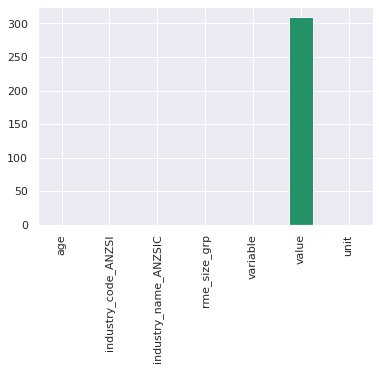

<matplotlib.axes._subplots.AxesSubplot at 0x7f0aad948ac0>

In [0]:
dataframe_pandas.isna().sum().plot(kind="bar")

In [0]:
dataframe_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 7 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 age 15480 non-null datetime64[ns]
 1 industry_code_ANZSI 15480 non-null object 
 2 industry_name_ANZSIC 15480 non-null object 
 3 rme_size_grp 15480 non-null object 
 4 variable 15480 non-null object 
 5 value 15171 non-null float64 
 6 unit 15480 non-null object 
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 846.7+ KB

In [0]:
# print(dataframe_pandas.value_counts())

In [0]:
for column in dataframe_pandas.columns:
  print(column, dataframe_pandas[column].dtype, dataframe_pandas[column].isna().sum(), dataframe_pandas[column])

age datetime64[ns] 0 0 2011-01-01
1 2011-01-01
2 2011-01-01
3 2011-01-01
4 2011-01-01
 ... 
15475 2020-01-01
15476 2020-01-01
15477 2020-01-01
15478 2020-01-01
15479 2020-01-01
Name: age, Length: 15480, dtype: datetime64[ns]
industry_code_ANZSI object 0 0 A
1 A
2 A
3 A
4 A
 ... 
15475 all
15476 all
15477 all
15478 all
15479 all
Name: industry_code_ANZSI, Length: 15480, dtype: object
industry_name_ANZSIC object 0 0 Agriculture, Forestry and Fishing
1 Agriculture, Forestry and Fishing
2 Agriculture, Forestry and Fishing
3 Agriculture, Forestry and Fishing
4 Agriculture, Forestry and Fishing
 ... 
15475 All Industries
15476 All Industries
15477 All Industries
15478 All Industries
15479 All Industries
Name: industry_name_ANZSIC, Length: 15480, dtype: object
rme_size_grp object 0 0 a_0
1 a_0
2 a_0
3 a_0
4 a_0
 ... 
15475 j_Grand_Total
15476 j_Grand_Total
15477 j_Grand_Total
15478 j_Grand_Total
15479 j_Grand_Total
Name: rme_size_grp, Length: 15480, dtype: object
variable object 0 0 Activity unit
1 Rolling mean employees
2 Salaries and wages paid
3 Sales, government funding, grants and subsidies
4 Total income
 ... 
15475 Total income
15476 Total expenditure
15477 Operating profit before tax
15478 Total assets
15479 Fixed tangible assets
Name: variable, Length: 15480, dtype: object
value float64 309 0 46134.0
1 0.0
2 279.0
3 8187.0
4 8866.0
 ... 
15475 733258.0
15476 654872.0
15477 77389.0
15478 2396143.0
15479 562646.0
Name: value, Length: 15480, dtype: float64
unit object 0 0 COUNT
1 COUNT
2 DOLLARS(millions)
3 DOLLARS(millions)
4 DOLLARS(millions)
 ... 
15475 DOLLARS(millions)
15476 DOLLARS(millions)
15477 DOLLARS(millions)
15478 DOLLARS(millions)
15479 DOLLARS(millions)
Name: unit, Length: 15480, dtype: object

In [0]:
dataframe_pandas.to_parquet("dataframe_pandas")

In [0]:
for column in dataframe_pandas.columns:
  if dataframe_pandas[column].dtype == "object":
    print("Column", column, "\n", dataframe_pandas[column].value_counts())

Column industry_code_ANZSI 
 N 810
L 810
E 810
B 810
Q 810
A 810
R 810
S 810
D 810
K 810
H 810
I 810
G 810
C 810
F 810
P 810
J 810
O 810
M 810
all 90
Name: industry_code_ANZSI, dtype: int64
Column industry_name_ANZSIC 
 Retail Trade 810
Transport, Postal and Warehousing 810
Agriculture, Forestry and Fishing 810
Construction 810
Manufacturing 810
Administrative and Support Services 810
Information Media and Telecommunications 810
Health Care and Social Assistance 810
Professional, Scientific and Technical Services 810
Wholesale Trade 810
Accommodation and Food Services 810
Mining 810
Public Administration and Safety 810
Rental, Hiring and Real Estate Services 810
Electricity, Gas, Water and Waste Services 810
Education and Training 810
Arts and Recreation Services 810
Financial and Insurance Services 810
Other Services 810
All Industries 90
Name: industry_name_ANZSIC, dtype: int64
Column rme_size_grp 
 h_200+ 1710
g_100-199 1710
i_Industry_Total 1710
c_6-9 1710
e_20-49 1710
f_50-99 1710
a_0 1710
d_10-19 1710
b_1-5 1710
j_Grand_Total 90
Name: rme_size_grp, dtype: int64
Column variable 
 Sales, government funding, grants and subsidies 1720
Operating profit before tax 1720
Total income 1720
Total expenditure 1720
Total assets 1720
Rolling mean employees 1720
Activity unit 1720
Salaries and wages paid 1720
Fixed tangible assets 1720
Name: variable, dtype: int64
Column unit 
 DOLLARS(millions) 12040
COUNT 3440
Name: unit, dtype: int64

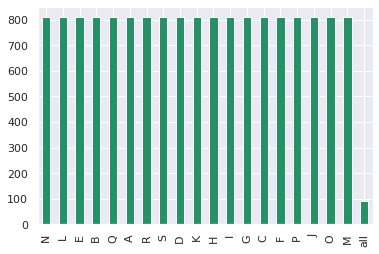

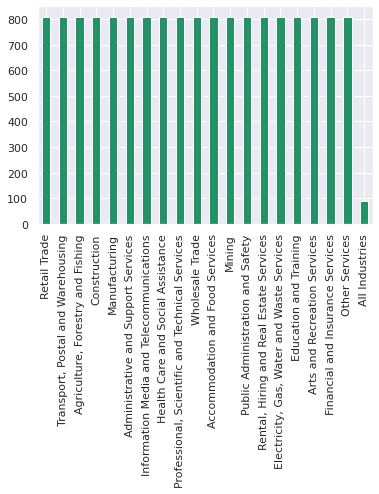

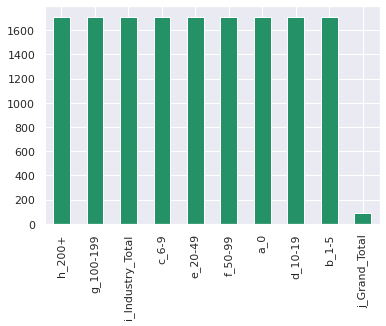

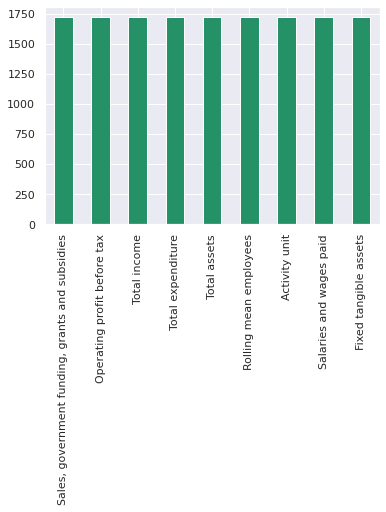

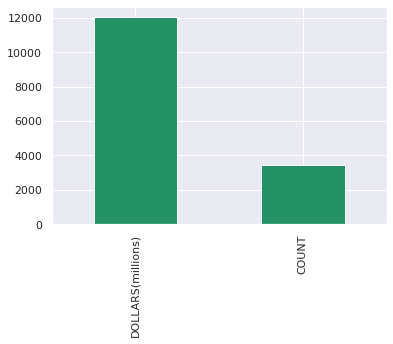

In [0]:
for column in dataframe_pandas.columns:
  if dataframe_pandas[column].dtype == "object":
     dataframe_pandas[column].value_counts().plot.bar()
     plt.show()

Out[44]: findfont: Font family ['ariel'] not found. Falling back to DejaVu Sans.

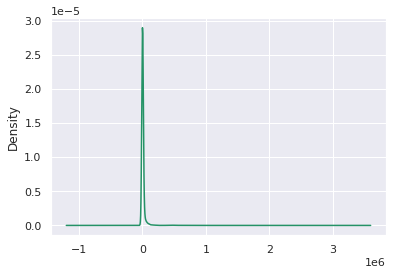

<matplotlib.axes._subplots.AxesSubplot at 0x7f0aac039040>

In [0]:
dataframe_pandas["value"].plot.kde()

In [0]:
print(f"Mean: {dataframe_pandas.value.mean()}, Median: {dataframe_pandas.value.median()}, Max Value: {dataframe_pandas.value.max()}, Min Value: {dataframe_pandas.value.min()}")

Mean: 12620.869158262474, Median: 1145.0, Max Value: 2396143.0, Min Value: -130.0

In [0]:
df_pandas = dataframe_pandas.copy()

In [0]:
dataframe_pandas["value"].fillna(value=dataframe_pandas.value.median(), inplace=True)

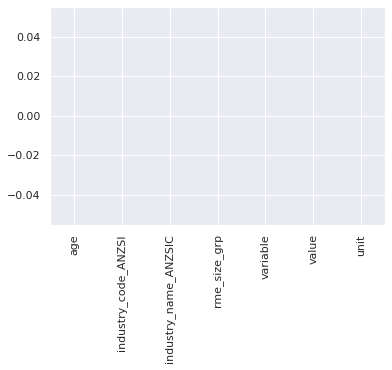

In [0]:
dataframe_pandas.isna().sum().plot.bar();